## Ice Temperature (icetemp) Package Tutorial

In [1]:
# Standard imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Imports from ice temperature estimation package
import icetemp
import icetemp.data_io as io
import icetemp.model as m

This package is intended to infer the change in temperature from measurements of temperature ($^\circ$C) and depth (m) off of thermistor provided by the AMANDA and IceCube collaborations. Our baseline hypothesis determines a quadratic relationship between the ice temperature and depth, but we will also consider a linear dependence. 

We have contructed a generative model to analyze the data which involves uniform priors for each term of the polinomials studied and a normal likelihood to relate the Gaussian uncertainties in one dimension. These uncertaintes or noise sources are considered directly related to the thermistor technical information. 
___
In the case of the straight line fit, we have $ T = f(d) = m \cdot d + b$ where d is the depth and T is the temperature. For each of the true T values with Gaussian uncertainties, we get that the frequency distribution $p(T_i|d_i,\sigma_{Ti},m,b)$ for $T_i$ is $$ p(T_i|d_i,\sigma_{Ti},m,b) = \frac{1}{\sqrt{2\pi \sigma_T^2}} \exp \Big(\frac{-(T_i - md_i - b)^2}{2\sigma_T^2}\Big).$$

From our prior information we can assume a positve yet small slope, given than the global warming has been documented as so. Regarding the intecept we can also assume it will be in the expected range of temperature in the Antarctic, which is on ground level (-20°C (summer) to -60°C (winter)).  We can then define our statistical model as:
$$ m \sim \text{Uniform}( m^l, m^u) \rightarrow m \sim \text{Uniform}(0\frac{^\circ \text{C}}{\text{m}},1\frac{^\circ \text{C}}{\text{m}}).$$
In general it would be good to consider a Jeffreys prior for this parameter.

$$ b \sim \text{Uniform}( b^l, b^u) \rightarrow b \sim \text{Uniform}(-60^{\circ}\text{C},-20^{\circ}\text{C})$$ where we define $\mu_i = m \cdot d_i + b$

$$ T_i \sim \text{Normal}(\mu_i,\sigma_\text{T})$$

The likelihood of the parameter is given by: 
$$ \mathcal{L} \propto \prod_i \frac{1}{\sqrt{2\pi \sigma_T^2}} \exp \Big(\frac{-(y_i - mx_i - b)^2}{2\sigma_T^2}\Big) $$
___
In the case of the quadratic line fit, we have $ T = f(d) = q \cdot d^2 + m \cdot d + b$ where d is the depth and T is the temperature. For each of the true T values with Gaussian uncertainties, we get that the frequency distribution $p(T_i|d_i,\sigma_{Ti},m,b)$ for $T_i$ is $$ p(T_i|d_i,\sigma_{Ti},m,b) = \frac{1}{\sqrt{2\pi \sigma_T^2}} \exp \Big(\frac{-(T_i - q d_i^2 - md_i - b)^2}{2\sigma_T^2}\Big).$$

From our prior information we can assume a positve yet small amplitude for the quadratic term, given than the global warming has been documented as so. Then similarly our linear term must be small to not interfer in the model, also negative based on the temperature scale of the region.Regarding the intecept we can also assume it will be in the expected range of temperature in the Antarctic, which is on ground level (-20°C (summer) to -60°C (winter)). We can then define our statistical model as:
$$ q \sim \text{Uniform}( q^l, q^u) \rightarrow q \sim \text{Uniform}(0\frac{^\circ \text{C}}{\text{m}^2},1 \frac{^\circ \text{C}}{\text{m}^2})$$ 

$$ m \sim \text{Uniform}( m^l, m^u) \rightarrow m \sim \text{Uniform}(-1\frac{^\circ \text{C}}{\text{m}},0\frac{^\circ \text{C}}{\text{m}})$$
In general it would be good to consider a Jeffreys prior for both of the previous parameters.
$$ b \sim \text{Uniform}( b^l, b^u) \rightarrow b \sim \text{Uniform}(-60^{\circ}\text{C},-20^{\circ}\text{C})$$ 

where we define $\mu_i = q \cdot d_i^2 + m \cdot d_i + b$

$$ T_i \sim \text{Normal}(\mu_i,\sigma_\text{T})$$

The likelihood of the parameter is given by: 
$$ \mathcal{L} \propto \prod_i \frac{1}{\sqrt{2\pi \sigma_T^2}} \exp \Big(\frac{-(y_i - q x_i^2 - mx_i - b)^2}{2\sigma_T^2}\Big) $$
___
___

#### Let's take a look at our data!

In [2]:
# load some (real) data
ex_data = io.load_ice_data("icecube_temp.2007.txt", data_year=2007,temp_errors=0.1, depth_errors=2)
print(ex_data)

    Temperature    Depth  data_year  temp_errors  depth_errors
0        -28.76 -2078.18       2007          0.1             2
1        -25.09 -2214.35       2007          0.1             2
2        -20.93 -2350.52       2007          0.1             2
3        -26.51 -2161.09       2007          0.1             2
4        -22.42 -2297.25       2007          0.1             2
5        -17.89 -2433.42       2007          0.1             2
6        -25.79 -2195.40       2007          0.1             2
7        -21.55 -2331.57       2007          0.1             2
8        -18.23 -2433.69       2007          0.1             2
9        -26.26 -2171.54       2007          0.1             2
10       -17.69 -2443.87       2007          0.1             2


Using our object (Pandas DataFrame) we can calculate the likelihood function of our statistical model. Below, the likelihood is calculated for some linear and quadratic test data. The details of how this test data was generated are provided in the `test_data` directory. 

The likelihood value for the linear model with the test data is 4090641.98
The likelihood value for the quadrartc model with the test data is 1349200.64


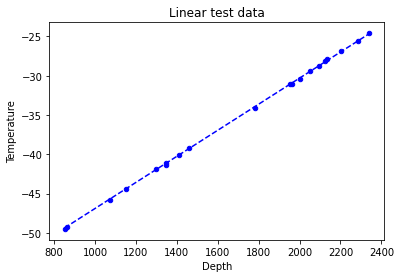

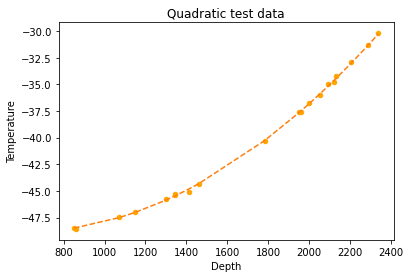

In [3]:
# defining model parameters for linear and quadratic fit (used to generate test data)
a0_lin, a1_lin = -6.35e1, 1.66e-2
a0_quad, a1_quad, a2_quad = -4.66e1, -7.47e-3, 6.18e-6

# linear test data
test_linear = io.load_ice_data("test_data_linear.txt", data_year=0, temp_errors=0.1, depth_errors=2, data_dir='test_data')
test_linear.plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1, color='blue')
x = test_linear['Depth'].values
print('The likelihood value for the linear model with the test data is {:.2f}'.format(m.calc_linear_likelihood(test_linear, a1_lin, a0_lin)))
x.sort()
plt.plot(x, a1_lin*x + a0_lin, color='blue', linestyle='dashed')
plt.title("Linear test data")

# quadratic test data
test_quad = io.load_ice_data("test_data_quadratic.txt", data_year=0, temp_errors=0.1, depth_errors=2, data_dir='test_data')
test_quad.plot(x='Depth', y='Temperature', kind='scatter', yerr=0.1,color='orange')
plt.plot(x, a2_quad*x**2 + a1_quad*x + a0_quad, linestyle='dashed')
plt.title("Quadratic test data")
print('The likelihood value for the quadrartc model with the test data is {:.2f}'.format(m.calc_quad_likelihood(test_quad, a2_quad, a1_quad, a0_quad)))